In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Train_data
train_data = pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")
# sample_data = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")

In [4]:
train_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [6]:
train_data.drop("id", axis=1, inplace=True)

In [7]:
test_data_id = test_data["id"]


In [8]:
test_data.drop("id", axis=1, inplace=True)

In [9]:
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [10]:
train_data.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,poutcome
count,750000,750000,750000,750000,750000,750000,750000,750000,750000
unique,12,3,4,2,2,2,3,12,4
top,management,married,secondary,no,yes,no,cellular,may,unknown
freq,175541,480759,401683,737151,411288,645023,486655,228411,672450


In [11]:
train_data.isnull().sum()
# There is no missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
train_data.duplicated().sum()

0

In [13]:
train_data["y"].value_counts(normalize=True)

y
0    0.879349
1    0.120651
Name: proportion, dtype: float64

<Axes: xlabel='y', ylabel='count'>

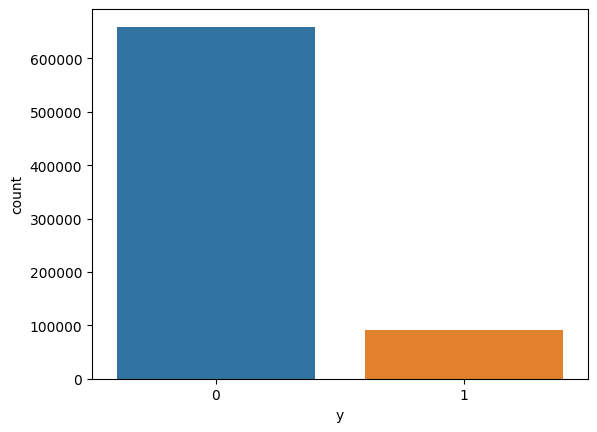

In [14]:
sns.countplot(x="y", data=train_data)

There is many of customers don't describe in deposit

In [15]:
numeric_data = train_data.select_dtypes("int64")
category_data = train_data.select_dtypes("object")

In [16]:
for col in category_data.columns:
    # print(col+" Feature")
    print(train_data[col].value_counts())
    print("#####################################")

job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64
#####################################
marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64
#####################################
education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64
#####################################
default
no     737151
yes     12849
Name: count, dtype: int64
#####################################
housing
yes    411288
no     338712
Name: count, dtype: int64
#####################################
loan
no     645023
yes    104977
Name: count, dtype: int64
#####################################
contact
cellular     486655
unknown      231627
telephone     31

In [17]:
numeric_data

,age,balance,day,duration,campaign,pdays,previous,y
0,42,7,25,117,3,-1,0,0
1,38,514,18,185,1,-1,0,0
2,36,602,14,111,2,-1,0,0
3,27,34,28,10,2,-1,0,0
4,26,889,3,902,1,-1,0,1
...,...,...,...,...,...,...,...,...
749995,29,1282,4,1006,2,-1,0,1
749996,69,631,19,87,1,-1,0,0
749997,50,217,17,113,1,-1,0,0
749998,32,-274,26,108,6,-1,0,0


In [18]:
# sns.pairplot(numeric_data)

In [19]:
def visualize_hist_box(data, col_name):
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(x=col_name, data=data, bins=20, kde=True, color="Green")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=col_name, data=data, color="Blue")

    plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


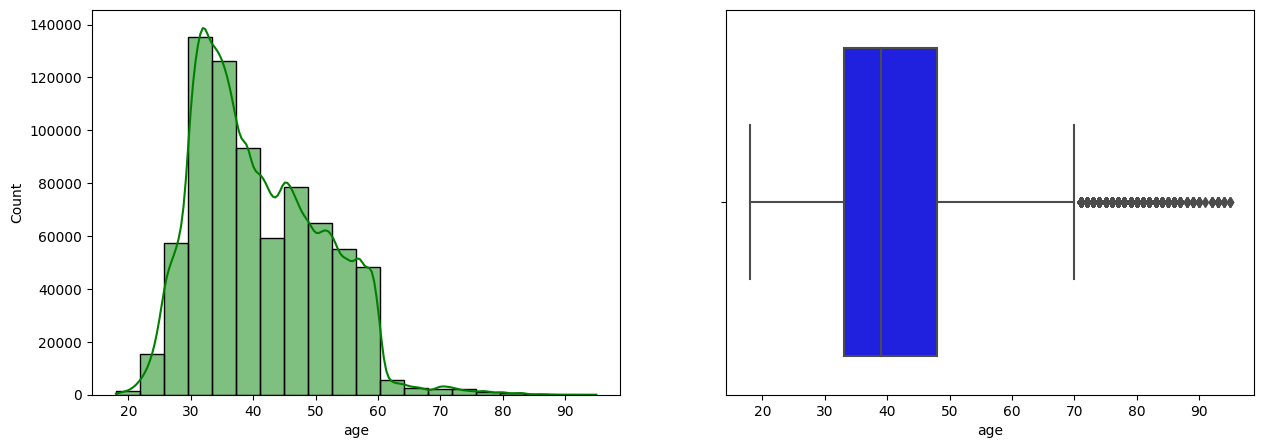

In [20]:
visualize_hist_box(numeric_data, "age")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


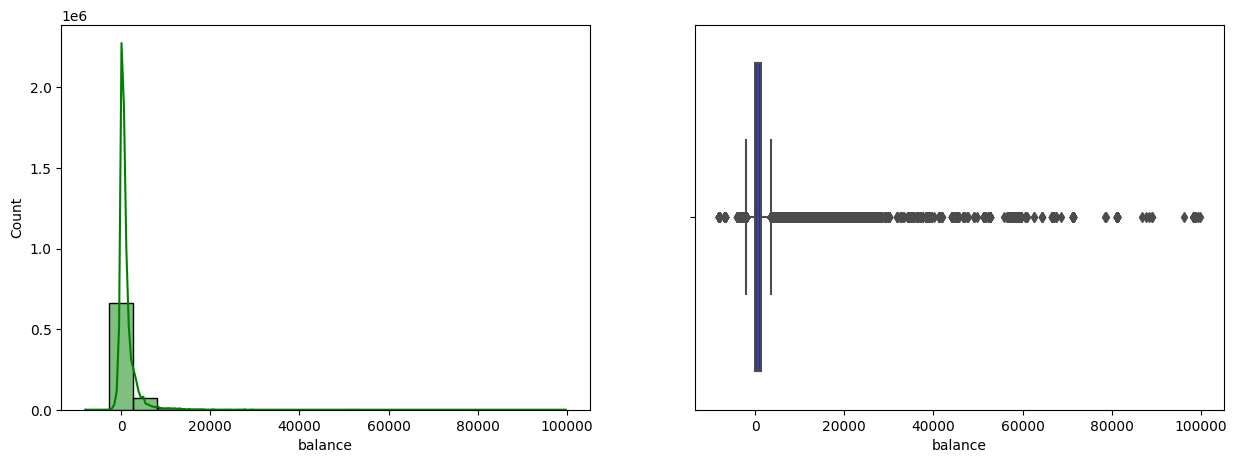

In [21]:
visualize_hist_box(numeric_data, "balance")

1. There are many outliers here we can use RobustScaler with them

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


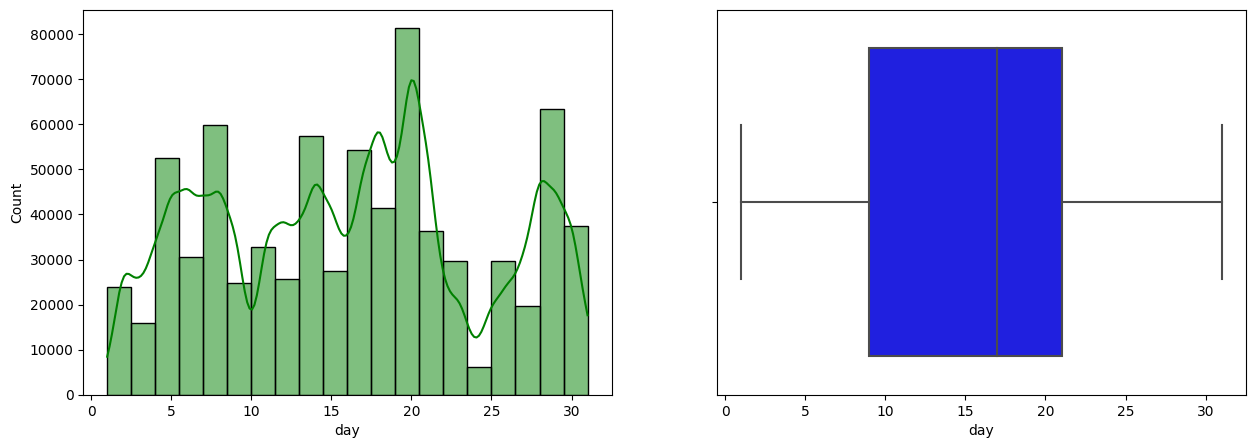

In [22]:
visualize_hist_box(numeric_data, "day")
# آخر تواصل كان يوم اي من الشهر.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


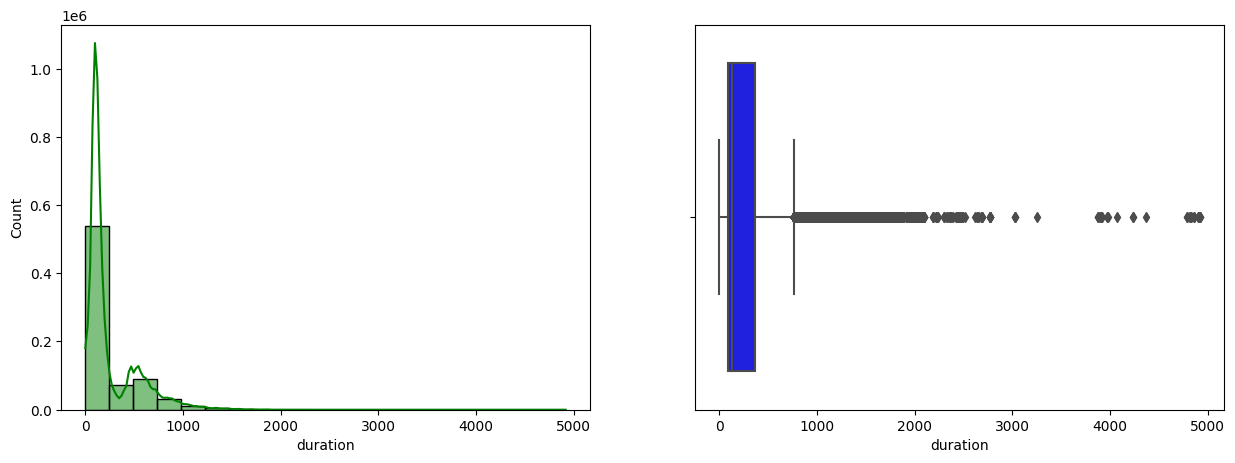

In [23]:
visualize_hist_box(numeric_data, "duration")
# This is important Feature can make dataleakage target
# مدة المكالمة الأخيرة (بالثواني).

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


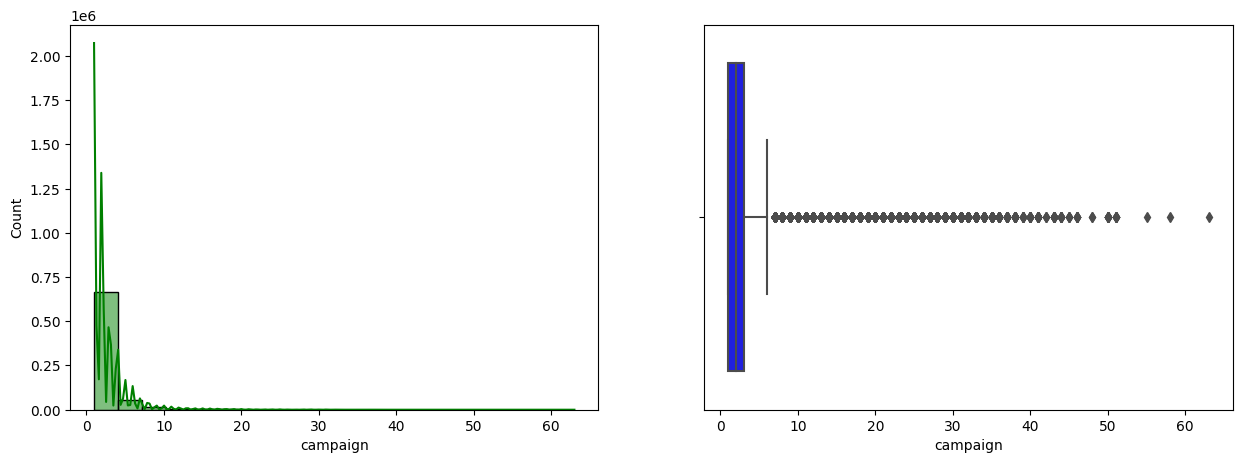

In [24]:
visualize_hist_box(numeric_data, "campaign")
# عدد المرات اللي تواصلت فيها الحملة مع العميل.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


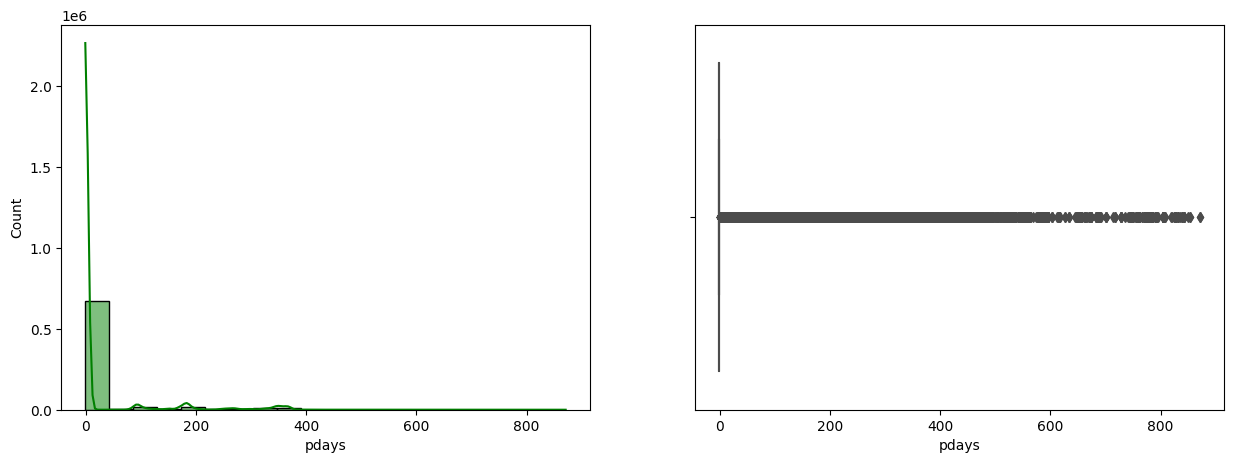

In [25]:
visualize_hist_box(numeric_data, "pdays")
# عدد الأيام منذ آخر تواصل سابق بالحملة.

In [26]:
numeric_data["pdays"].value_counts()


pdays
-1      672434
 182      2515
 92       2275
 183      2074
 181      1698
         ...  
 759         1
 529         1
 794         1
 617         1
 376         1
Name: count, Length: 596, dtype: int64

In [27]:
train_data["contacted_before"] = train_data["pdays"].apply(lambda x: 0 if x == -1 else 1)

In [28]:
test_data["contacted_before"] = test_data["pdays"].apply(lambda x: 0 if x == -1 else 1)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


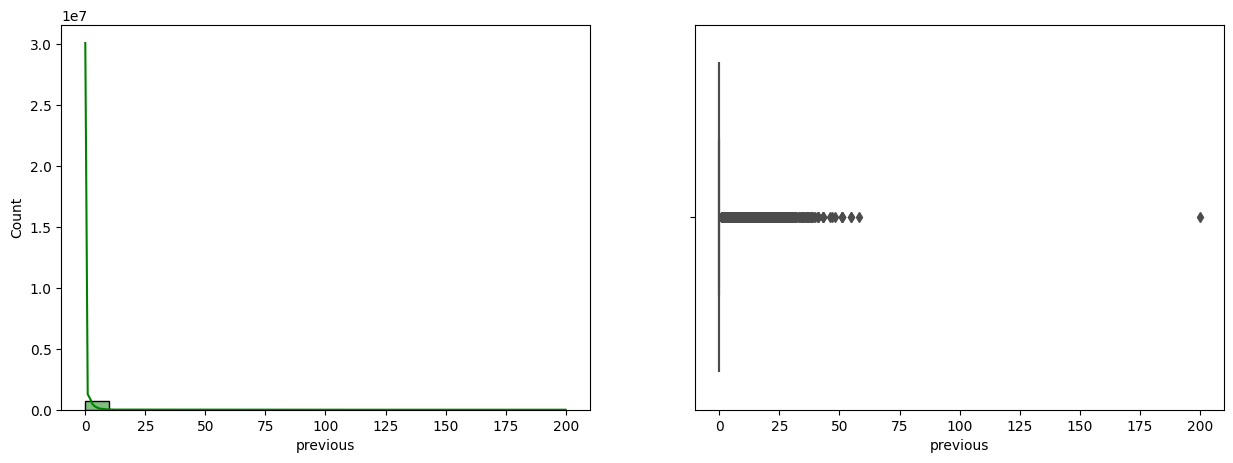

In [29]:
visualize_hist_box(numeric_data, "previous")
# عدد مرات التواصل السابقة بالحملات الماضية.

In [30]:
numeric_data.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.062838,-0.015179,-0.004388,0.002052,-0.021635,0.004541,0.009523
balance,0.062838,1.000000,-0.008269,0.109629,-0.027744,0.010040,0.033897,0.122513
day,-0.015179,-0.008269,1.000000,-0.056755,0.178806,-0.086197,-0.051082,-0.049625
duration,-0.004388,0.109629,-0.056755,1.000000,-0.083016,0.047555,0.040105,0.519283
campaign,0.002052,-0.027744,0.178806,-0.083016,1.000000,-0.061465,-0.026707,-0.075829
pdays,-0.021635,0.010040,-0.086197,0.047555,-0.061465,1.000000,0.561839,0.089277
previous,0.004541,0.033897,-0.051082,0.040105,-0.026707,0.561839,1.000000,0.119552
y,0.009523,0.122513,-0.049625,0.519283,-0.075829,0.089277,0.119552,1.000000


<Axes: >

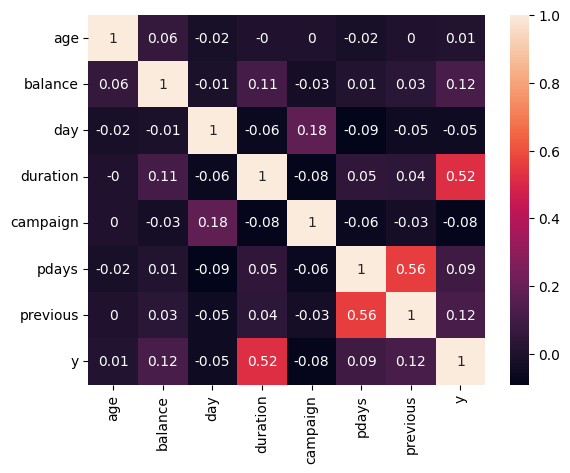

In [31]:
sns.heatmap(numeric_data.corr().round(2), annot=True)

In [32]:
spearman_corr = numeric_data.corr(method="spearman")["y"].sort_values(ascending=False)
spearman_corr

y           1.000000
duration    0.439505
balance     0.197585
previous    0.170808
pdays       0.160032
age        -0.023160
day        -0.050879
campaign   -0.092629
Name: y, dtype: float64

In [33]:
train_data.drop(["day", "age"], axis=1, inplace=True)

In [34]:
test_data.drop(["day", "age"], axis=1, inplace=True)

In [35]:

nominal_colums = ["job", "contact", "month"]
ordinal_columns = ["marital", "education", "default", "housing", "loan", "poutcome"]


In [36]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ohe_encdoing_data_train = ohe.fit_transform(train_data[nominal_colums])

ohe_df_train = pd.DataFrame(
    ohe_encdoing_data_train,
    columns=ohe.get_feature_names_out(nominal_colums),
    index=train_data.index
)


ohe_encdoing_data_test = ohe.transform(test_data[nominal_colums])

ohe_df_test = pd.DataFrame(
    ohe_encdoing_data_test,
    columns=ohe.get_feature_names_out(nominal_colums),
    index=test_data.index
)


train_data = pd.concat([train_data.drop(nominal_colums, axis=1), ohe_df_train], axis=1)
test_data  = pd.concat([test_data.drop(nominal_colums, axis=1),  ohe_df_test], axis=1)



In [37]:
from sklearn.preprocessing import LabelEncoder


encoders = {}

for col in ordinal_columns:
    le = LabelEncoder()
    le.fit(train_data[col])  
    encoders[col] = le        
    
    train_data[col + "_leencoding"] = le.transform(train_data[col])

train_data = pd.concat([train_data.drop(ordinal_columns , axis=1), ohe_df_train], axis=1)


for col in ordinal_columns:
    le = encoders[col] 
    
    test_data[col + "_leencoding"] = test_data[col].map(
        lambda x: le.transform([x])[0] if x in le.classes_ else -1
    )

test_data = pd.concat([test_data.drop(ordinal_columns , axis=1), ohe_df_test], axis=1)



In [38]:
numeric_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [39]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

scaler = RobustScaler()
columns_names_for_scaling = ["duration","balance", "campaign", "pdays", "previous"]
scaled_train = scaler.fit_transform(train_data[columns_names_for_scaling])
scaled_train_df = pd.DataFrame(
    scaled_train,
    columns=["duration_scaled","balance_scaled", "campaign_scaled", "pdays_scaled", "previous_scaled"],
    index=train_data.index
)
train_scaled = pd.concat(
    [train_data.drop(columns=columns_names_for_scaling), scaled_train_df],
    axis=1
)

scaled_test = scaler.transform(test_data[columns_names_for_scaling])
scaled_test_df = pd.DataFrame(
    scaled_test,
    columns=["duration_scaled","balance_scaled", "campaign_scaled", "pdays_scaled", "previous_scaled"],
    index=test_data.index
)
test_scaled = pd.concat(
    [test_data.drop(columns=columns_names_for_scaling), scaled_test_df],
    axis=1
)


In [40]:
train_scaled['y']

0         0
1         0
2         0
3         0
4         1
         ..
749995    1
749996    0
749997    0
749998    0
749999    0
Name: y, Length: 750000, dtype: int64

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X = train_scaled.drop("y", axis=1).values
y = train_scaled["y"].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [42]:
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.8685822222222223

In [43]:
y_pre = model.predict(X_val)


In [44]:
y_pre_proba = model.predict_proba(X_val)

In [45]:
print(classification_report(y_pre, y_val))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92    174812
           1       0.88      0.48      0.62     50188

    accuracy                           0.87    225000
   macro avg       0.87      0.73      0.77    225000
weighted avg       0.87      0.87      0.85    225000



In [46]:
confusion_matrix(y_pre, y_val)

array([[171463,   3349],
       [ 26220,  23968]])

In [47]:
y_predicted_test = model.predict(test_scaled)
y_predicted_test_proba = model.predict_proba(test_scaled)

y_predicted_test_proba.shape

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


(250000, 2)

In [48]:
df_submit = pd.DataFrame({
    "id": test_data_id,
    "y": y_predicted_test_proba[:, 1]
})


In [49]:
df_submit

,id,y
0,750000,0.029978
1,750001,0.844938
2,750002,0.033633
3,750003,0.006600
4,750004,0.112404
...,...,...
249995,999995,0.041842
249996,999996,0.520174
249997,999997,0.878807
249998,999998,0.015803


In [50]:
# from sklearn.svm import SVC

# svc_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
# svc_model.fit(X_train, y_train)
# y_pred = svc_model.predict(X_val)

# print(classification_report(y_val,y_pred))

In [51]:
df_submit.to_csv("submission.csv", index=False)


In [52]:
!ls

__notebook__.ipynb  submission.csv
